# Elephant - Non Elephant V3

## 1. Importing necessary libraries

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
import os
import numpy as np

## 2. Image Preprocessing and Loading the Dataset

In [6]:
# Apply the same transforms
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder('/kaggle/input/elephant-nonelephantv2/Animal_dataset/train', transform=transform)
val_dataset = datasets.ImageFolder('/kaggle/input/elephant-nonelephantv2/Animal_dataset/val', transform=transform)
test_dataset = datasets.ImageFolder('/kaggle/input/elephant-nonelephantv2/Animal_dataset/test', transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


## 3. Define the CNN Model

In [7]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)
        self.fc = nn.Linear(32 * 16 * 16, 2)

    def forward(self, x):
        x = self.pool1(self.act1(self.conv1(x)))
        x = self.pool2(self.act2(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

model = SimpleCNN()
print(model)


SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=8192, out_features=2, bias=True)
)


## 4. Loss Function and Optimizer && Training the model && Evaluating the Model

In [9]:
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets

# Assuming model and dataloaders are already defined

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(num_epochs):
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        
        # Training loop with tqdm for progress bar
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0
        train_bar = tqdm(train_loader, desc='Training', leave=False)
        for images, labels in train_bar:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            
            train_bar.set_postfix({
                'loss': f'{loss.item():.4f}',
                'acc': f'{100. * correct_train / total_train:.2f}%'
            })
        
        # Validation loop with tqdm for progress bar
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        val_bar = tqdm(val_loader, desc='Validating', leave=False)
        with torch.no_grad():
            for images, labels in val_bar:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

                val_bar.set_postfix({
                    'val_loss': f'{loss.item():.4f}',
                    'val_acc': f'{100. * correct_val / total_val:.2f}%'
                })
        
        # Logging at the end of the epoch
        train_acc = 100 * correct_train / total_train
        val_acc = 100 * correct_val / total_val
        print(f"Epoch {epoch+1} - Train Acc: {train_acc:.2f}%, Loss: {train_loss/len(train_loader):.4f} - Val Acc: {val_acc:.2f}%, Val Loss: {val_loss/len(val_loader):.4f}")

    print('Finished Training')
    torch.save(model.state_dict(), '/kaggle/working/model.pth')

train_model(10)


Epoch 1/10


Epoch 1 - Train Acc: 81.20%, Loss: 0.4159 - Val Acc: 84.00%, Val Loss: 0.3620
Epoch 2/10


Epoch 2 - Train Acc: 86.58%, Loss: 0.3172 - Val Acc: 86.85%, Val Loss: 0.3164
Epoch 3/10


Epoch 3 - Train Acc: 88.73%, Loss: 0.2760 - Val Acc: 86.17%, Val Loss: 0.3236
Epoch 4/10


Epoch 4 - Train Acc: 89.90%, Loss: 0.2433 - Val Acc: 88.30%, Val Loss: 0.2858
Epoch 5/10


Epoch 5 - Train Acc: 91.31%, Loss: 0.2138 - Val Acc: 87.45%, Val Loss: 0.3094
Epoch 6/10


Epoch 6 - Train Acc: 92.06%, Loss: 0.1950 - Val Acc: 87.00%, Val Loss: 0.3343
Epoch 7/10


Epoch 7 - Train Acc: 93.05%, Loss: 0.1733 - Val Acc: 90.85%, Val Loss: 0.2516
Epoch 8/10


Epoch 8 - Train Acc: 93.79%, Loss: 0.1503 - Val Acc: 89.80%, Val Loss: 0.2860
Epoch 9/10


Epoch 9 - Train Acc: 94.67%, Loss: 0.1384 - Val Acc: 92.06%, Val Loss: 0.2455
Epoch 10/10


Epoch 10 - Train Acc: 95.16%, Loss: 0.1221 - Val Acc: 91.37%, Val Loss: 0.2684
Finished Training


Confusion matrix, without normalization


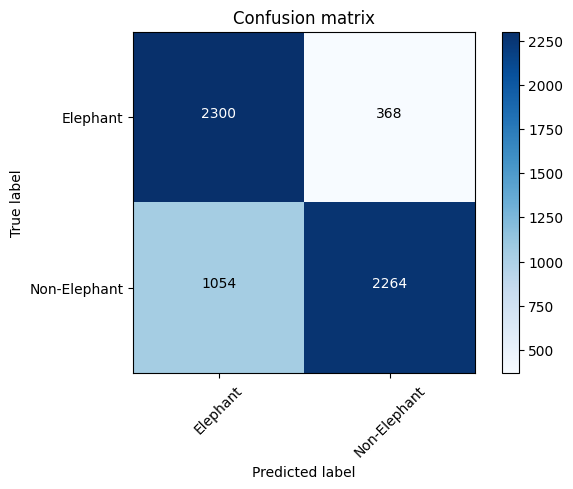

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Evaluate model
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.tolist())
        y_true.extend(labels.tolist())

cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, classes=['Elephant', 'Non-Elephant'])

plt.show()


In [12]:
# Load the trained model
model_path = '/kaggle/working/model.pth'
model = SimpleCNN()
model.load_state_dict(torch.load(model_path))
model.eval()


/tmp/ipykernel_30/1053087826.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=8192, out_features=2, bias=True)
)

Testing: 100%|██████████| 188/188 [00:54<00:00,  3.46it/s, accuracy=76.24%]


Accuracy of the model on test images: 76.24%


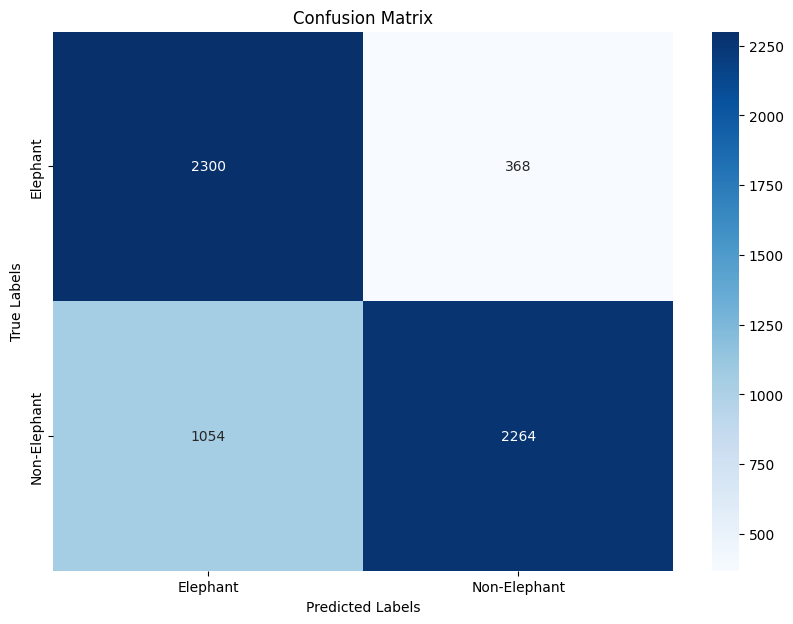

In [13]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Test dataset evaluation with tqdm
test_correct = 0
test_total = 0
y_true = []
y_pred = []

test_bar = tqdm(test_loader, desc='Testing')
with torch.no_grad():
    for images, labels in test_bar:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        
        test_accuracy = 100 * test_correct / test_total
        test_bar.set_postfix({
            'accuracy': f'{test_accuracy:.2f}%'
        })

test_accuracy = 100 * test_correct / test_total
print(f'Accuracy of the model on test images: {test_accuracy:.2f}%')

# Confusion Matrix Calculation and Visualization
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Elephant', 'Non-Elephant'], yticklabels=['Elephant', 'Non-Elephant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
